In [4]:
import numpy as np
import matplotlib.pyplot as plt

The one-dimensional wave equation is given by

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}
$$

We want to find $u(x,t)$ s.t. this equation holds, where $u(x,t)$ gives the vertical displacement of the wave. To specify the wave, we apply two BCs:

$$
\begin{align}
u(0,t)&=0 \quad \text{(left side fixed at 0)} \\
u(1,t)&=0 \quad \text{(right side fixed at 1)}
\end{align}
$$

and two ICs:

$$
\begin{align}
u(x,0)&=f(x) \quad \text{(initial position of every point on wave)} \\
\frac{\partial u(x,0)}{\partial t} &= g(x) \quad \text{(initial velocity of every point on wave)}
\end{align}
$$

We can solve the equation using separation of variables. We start by assuming that 

$$
u(x,t) = F(x)G(t)
$$

Differentiating twice w.r.t time, we obtain

$$
\frac{\partial^2 u}{\partial t^2} = F(x) \frac{\partial^2G(t)}{\partial t^2} = F(x) \ddot{G}(t)
$$

Differentiating twice w.r.t position, we obtain

$$
\frac{\partial^2 u}{\partial x^2} = \frac{\partial^2F(x)}{\partial x^2} G(t) = F''(x) G(t) 
$$

Plugging into the wave equation, we have

$$
F(x) \ddot{G}(t) = c^2 F''(x) G(t)
$$

Dividing by $c^2FG,$

$$
\frac{\ddot{G}(t)}{c^2G(t)} = \frac{F''(x)}{F(x)} = k
$$

where $k$ is a (separation) constant that both of these fractions must be equal to because $x,t$ are independent. Rearranging, we obtain two second order linear ODEs:

$$
\begin{align}
\ddot{G}(t) - c^2 k G(t) &= 0 \\
F''(x) - k F(x) &= 0
\end{align}
$$

Now we want to satisfy our BCs:

$$
\begin{align}
u(0,t)&=0=F(0)G(t) \\
u(1,t)&=0=F(1)G(t)
\end{align}
$$

To have a non-trivial solution, $G(t) \neq 0$ and $k \le 0$. Therefore $F(0)=0,F(1)=0,$ and we will let $k=-p^2$ to remind ourselves that $k$ is negative. Now we can solve $F''(x)+p^2F(x)=0$, subject to these BCs. Notice that this is a simple harmonic oscillator, which we know the general solution of.

$$
F(x) = A \cos (px) + B \sin (px) \\
\Longrightarrow F_n(x) = B \sin( n\pi x), \quad n \in \mathbb{Z}
$$

Our second ODE is $\ddot{G}(t) + c^2 p^2 G(t) = 0$. Above, we found that $p=n\pi, n \in \mathbb{Z}$, so this becomes $\ddot{G}(t) + (cn\pi)^2 G(t) = 0$. Leting $cn\pi = \lambda_n$, we obtain $\ddot{G}(t) + \lambda_n^2 G(t)=0$, another simple harmonic oscillator that we know the general solution of.

$$
G_n(t) = A_n \cos (\lambda_nt) + B_n \sin (\lambda_nt), \quad n \in \mathbb{Z}
$$

Combining the solutions of our two ODEs, we obtain

$$
\begin{align}
u_n(x,t) &= F_n(x) G_n(t) \\
&= B \sin( n\pi x) \left[ A_n \cos (\lambda_nt) + B_n \sin (\lambda_nt) \right] \\
&= \left[ BA_n \cos (\lambda_nt) + BB_n \sin (\lambda_nt) \right] \sin( n\pi x) \\
&= \left[ A_n \cos (\lambda_nt) + B_n \sin (\lambda_nt) \right] \sin( n\pi x) \quad \text{(combining constants)}
\end{align}
$$

where $\lambda_n=cn\pi, n \in \mathbb{Z}$. By the principle of superposition, we know that a linear combination of solutions will also be a solution to the PDE. Therefore, we write the total solution as

$$
\begin{align}
u(x,t) &= \sum_{n=1}^\infty u_n(x,t) \\
&= \sum_{n=1}^\infty \left[ A_n \cos (\lambda_nt) + B_n \sin (\lambda_nt) \right] \sin( n\pi x)
\end{align}
$$

Finally, we are ready to satisfy the ICs, which are defined at $t=0$. The IC in position is

$$
\begin{align}
u(x,0) &= \sum_{n=1}^\infty A_n \sin( n\pi x) = f(x)
\end{align}
$$

Using Fourier analysis, we know that

$$
A_n = 2\int_0^1 f(x) \sin(n\pi x) dx, \quad n \in \mathbb{Z}
$$

For the IC in velocity, we derive

$$
\frac{\partial u}{\partial t} = \sum_{n=1}^\infty \left[ -A_n\lambda_n \sin (\lambda_nt) + B_n\lambda_n \cos (\lambda_nt) \right] \sin( n\pi x)
$$

Therefore, the IC in velocity is

$$
\begin{align}
\frac{\partial u(x,0)}{\partial t} &= \sum_{n=1}^\infty B_n \lambda_n \sin( n\pi x) = g(x)
\end{align}
$$

Using a similar Fourier analysis, we obtain

$$
\begin{align}
B_n &= \frac{2}{\lambda_n}\int_0^1 g(x) \sin(n\pi x) dx, \quad n \in \mathbb{Z} \\
&= \frac{2}{cn\pi}\int_0^1 g(x) \sin(n\pi x) dx, \quad n \in \mathbb{Z}
\end{align}
$$

Therefore, the final solution is

$$
u(x,t) = \sum_{n=1}^\infty \left[ A_n \cos (cn\pi t) + B_n \sin (cn\pi t) \right] \sin( n\pi x), \\
A_n = 2\int_0^1 f(x) \sin(n\pi x) dx, \quad \\
B_n = \frac{2}{cn\pi}\int_0^1 g(x) \sin(n\pi x) dx
$$

It is common to let the initial velocity function $g(x)=0$, in which case $B_n=0$ for all $n$. $f(x)$ is up to us, but to make things easy we can let $f(x)=\sin (N\pi x)$. Then, we will have 

$$
A_n = \begin{cases} 
      1 & n=N \\
      0 & n \neq N
   \end{cases}
$$

Therefore, our analytical solution becomes 

$$
\boxed{u(x,t) = \cos(Nc\pi t) \sin(N\pi x)}
$$

In [2]:
# Get the solution over x (range of vals in [0,1]), at time t, wave speed c
def get_solution(x, t, c, n_modes):
    sol = np.cos(n_modes*c*np.pi*t)*np.sin(n_modes*np.pi*x)
    return sol

# Plot the solution(s) at time(s) t
def plot_solution(x, t, c, n_modes):
    fig, ax = plt.subplots(figsize=(10,7))
    try:
        for t_i in t:
            sol = get_solution(x, t_i, c, n_modes)
            ax.plot(x, sol, label=f"t={t_i:.3f}")
            ax.set_xlabel("$x$")
            ax.set_ylabel("$u(x,t)$")
            ax.set_title("Analytical solutions to wave equation")
        #ax.legend()
    except:
        sol = get_solution(x, t, c, n_modes)
        ax.plot(x, sol)
        ax.set_xlabel("$x$")
        ax.set_ylabel("$u(x,t)$")
        ax.set_title(f"Analytical solution to wave equation at t={t}")
    plt.show()

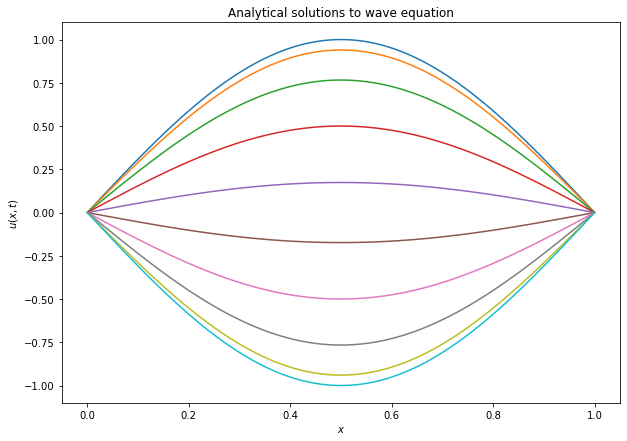

In [5]:
# Specify parameters
x = np.linspace(0,1,100)
c = 1
t = np.linspace(0,1,10)
n_modes = 1

# Plot the solutions
plot_solution(x, t, c, n_modes)

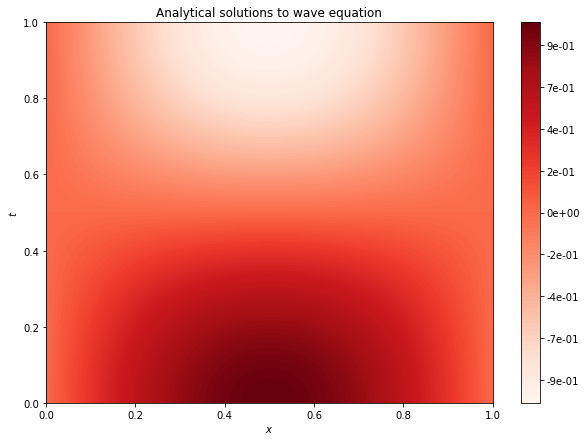

In [7]:
# Create PDE contour plot
x = np.linspace(0,1,100)
c = 1
t = np.linspace(0,1,100)
xx, tt = np.meshgrid(x, t)
sol = get_solution(xx, tt, c, n_modes=1)
fig, ax = plt.subplots(figsize=(10,7))
cf = ax.contourf(xx, tt, sol, cmap="Reds", levels=100)
cb = fig.colorbar(cf, format='%.0e', ax=ax)
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
ax.set_title("Analytical solutions to wave equation")
plt.show()

To solve this with neural networks, we need a new reparameterization. Shuheng has suggested that we try

$$
u(x,t) = A(x,t) + x(1-x) \left( 1-e^{-t^2} \right)ANN(x,t) \\
A(x,t) = u(x,0) + t \frac{\partial u(x,0)}{\partial t}
$$